# MC886 - Projeto 2
Aluno: Mateus Feitosa Olivi  RA: 222059

# Parte 1:
    
<p style="text-align: justify;">
&emsp; O problema dessa primeira parte do projeto está relacionada a predição da posicão de uma bola que é chutada contra um gol, para executar essa tarefa foi dado dois datasets, kick1.dat e kick2.dat, esses datasets representam duas trajetórias diferentes para a bola. Conhecidas essas duas trajetórias terei que implementar os algoritmos da regressão linear e polinomial, para que eu possa aplicar sobre os dois datasets e descobrir, através de métricas de avaliação, qual é o modelo mais adequado para cada dataset.
</p>

### 1. Implementações:

<p style="text-align: justify;">
&emsp; Para implementar as regressões linear e polinomial irei usar o método do gradiente descendente, esse método considera como hipótese $h_{\theta}(x)$ e se baseia em atualizar os pesos $\theta_i$ utilizando as derivadas da função custo, irei explicar melhor isso na explicação da implementacao de cada regressão.
<\p>

#### 1.1 Regressão Linear:
<p style="text-align: justify;">
&emsp; Para aplicar a regressão linear irei considerar a hipótese como $h_{\theta}(x) = \theta_{0} + \theta_{1}x$. Sabe-se também que a função custo é definida por:
     $$J(\theta_{0},\theta_{1}) = \frac{1}{2m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]^2$$
&emsp; Como dito anteriormente, no gradiente descentende, a atualização dos valores de $\theta$ é dado utilizando as derivadas parciais da função custo, isso é:
    $$\theta_{i} := \theta_{i} - \alpha\frac{\partial}{\partial \theta_{i}}J(\theta_{0},\theta_{1})$$
&emsp; Fazendo as derivadas parciais temos que, para $\theta_{0}$ e $\theta_{1}$, as atualizações são dadas por:
    $$\theta_{0} := \theta_{0} - \alpha\frac{1}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]  \ \ \ 
    e \ \ \ \theta_{1} := \theta_{1} - \alpha\frac{1}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i}$$
&emsp; Note que $\alpha$ é a taxa de aprendizado. Agora sabendo como funciona o gradiente descendente para a regressão linear posso implementar o seguinte algoritmo:
</p>

In [56]:
def gradienteDescendenteLinear(Theta, y, x, alpha):
    m = len(x)
    Derivada1, Derivada2 = 1, 1
    iteracoes = 0
    
    while(abs(Derivada1) > 0.0001 or abs(Derivada2) > 0.0001):
        Somatorio1, Somatorio2 = 0,0
        
        for i in range(m):
            hi = Theta[0] + Theta[1]*x[i]
            yi = y[i]
            
            temp = (hi - yi)
            
            Somatorio1 += temp*1
            Somatorio2 += temp*x[i]
        
        Derivada1 = Somatorio1/m
        Derivada2 = Somatorio2/m
        
        Theta[0] = Theta[0] - alpha*Derivada1
        Theta[1] = Theta[1] - alpha*Derivada2
        
        iteracoes += 1
        
    return Theta, iteracoes

<p style="text-align: justify;">
&emsp; Note que este algoritmo atualiza os valores de $\theta$ até que as derivadas parciais da função custo estejam suficientemente próximo a zero, isso pode ser feito porque se as derivadas da função custo estão próximas a zero, então o valor de $\theta$ já está suficientemente próximo a um valor de mínimo. Assim, no meu algoritmo considerei que se os valores das derivadas forem menor que $10^{-4}$, então o valor achado de $\theta$ já está bom.<br>
&emsp;Ainda vale notar que essa função retorna uma lista com os valores atualizados de $\theta$ e o número de iterações que o algoritmo fez para obter a resposta.
</p>

#### 1.2 Regressão Polinomial:
<p style="text-align: justify;">
&emsp; Para aplicar a regressão polinomial irei considerar a hipótese como $h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2$, justificarei o grau da hipótese mais a frente. A função custo ainda é a mesma, mas agora ela também está em função do $\theta_{2}$:
     $$J(\theta_{0},\theta_{1},\theta_{2}) = \frac{1}{2m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]^2$$
&emsp; Da mesma forma que foi feito para regressão linear, os valores de $\theta$ são atualizados derivando a função custo:
    $$\theta_{i} := \theta_{i} - \alpha\frac{\partial}{\partial \theta_{i}}J(\theta_{0},\theta_{1},\theta_{2})$$
&emsp; Fazendo as derivadas parciais temos que, para $\theta_{0}$, $\theta_{1}$ e $\theta_{2}$, as atualizações são dadas por:
    $$\theta_{0} := \theta_{0} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]  \ \ \ 
    , \ \ \ \theta_{1} := \theta_{1} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i} \ \ \
    e \ \ \ \theta_{2} := \theta_{2} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i}^2$$
&emsp; Lembre-se que $\alpha$ é a taxa de aprendizado. Agora sabendo como funciona o gradiente descendente para a regressão polinomial posso implementar o seguinte algoritmo:
</p>

In [57]:
def gradienteDescendentePolinomial(Theta, y, x, alpha):
    m = len(x)
    iteracoes = 0
    Derivada1,Derivada2,Derivada3 = 1,1,1
    
    while(abs(Derivada1) > 0.0001 or abs(Derivada2) > 0.0001 or abs(Derivada3) > 0.0001):
        Somatorio1, Somatorio2, Somatorio3 = 0,0,0
        
        for i in range(m):
            hi = Theta[0] + Theta[1]*x[i] + Theta[2]*(x[i])**2
            yi = y[i]
            
            temp = (hi - yi)
            
            Somatorio1 += temp*1
            Somatorio2 += temp*x[i]
            Somatorio3 += temp*(x[i])**2
        
        Derivada1 = 2*Somatorio1/m
        Derivada2 = 2*Somatorio2/m
        Derivada3 = 2*Somatorio3/m
        
        Theta[0] = Theta[0] - alpha*Derivada1
        Theta[1] = Theta[1] - alpha*Derivada2
        Theta[2] = Theta[2] - alpha*Derivada3
        
        iteracoes += 1
    return Theta, iteracoes

<p style="text-align: justify;">
&emsp; Neste algoritmo, usei o mesmo critério de parada que apliquei na regressão linear, isso é, os valores de $\theta$ serão atualizados até que as derivadas parciais da função custo estejam suficientemente próximo a zero, no meu caso menor que $10^{-4}$.<br>
&emsp;Ainda vale relembrar que, assim como apliquei para a regressão linear, essa função também retorna uma lista com os valores atualizados de $\theta$ e o número de iterações que o algoritmo fez para obter a resposta.
</p>

#### 1.3 Erros:
<p style="text-align: justify;">
&emsp; Um outro importante tipo de algoritmo que preciso implementar é um algoritmo para avaliação das regressões, no meu caso irei implementar o MSE (Mean Squared Error), o MSE é dado por:
    $$ MSE = \frac{1}{n} \sum_{j=1}^n (\hat{y}_j - y_j)^2$$
&emsp; Assim, posso implementar o seguinte algoritmo para o MSE:
</p>

In [218]:
def MSE(yreal, ytreino):
    n = len(yreal)
    MSE = 0
    
    for i in range(n):
        MSE += (yreal[i] - ytreino[i])**2
    
    MSE = MSE/n
    
    return MSE

<p style="text-align: justify;">
&emsp; Mas note, o MSE requer os valores de y que foram obtidos a partir do treino, isso é, os valores de $y(x)$ que podem ser obtidos usando os coeficientes da regressão. Para isso posso fazer uma função, para obter o valor de $y(x)$ para regressão linear e para regressão polinomial de grau 2:
</p>

In [216]:
def f(Theta, X, grau):
    if(grau == 1):
        y = lambda x: Theta[0] + Theta[1]*x
    elif(grau == 2):
        y = lambda x: Theta[0] + Theta[1]*x + Theta[2]*x**2
    
    y_lista = []
    
    for i in range(len(X)):
        y_lista.append(y(X[i]))
    return y_lista

#### 1.4 Dados
<p style="text-align: justify;">
&emsp; Ainda me falta implementar uma função para fazer a leitura dos dados do dataset, essa é uma função bem simples, utilizarei nela a biblioteca pandas:
</p>

In [3]:
import pandas as pd
def Dados(caminho):
    X = pd.read_csv(caminho, sep = '\\s+', header = None)
    return X.values

#### 1.5 Plot
<p style="text-align: justify;">
&emsp; Agora vou implementar funções de plot para mostrar o resultado das regressões. Primeiro vou implementar duas funções para o plot de uma função linear e uma para o plot de uma polinomial de segundo grau. Além disso tenho duas funções auxiliares para fazer a legenda do gráfico, descrevendo a função:
</p>

In [198]:
import matplotlib.pyplot as plt

def legendaLinear(Theta, label):
    
    a = str(round(Theta[0],5))
    b = str(abs(round(Theta[1],5)))
    
    if(Theta[1] < 0):
        sinal = ' - '
    else:
        sinal = ' + '
    
    return label[0] + ' = ' + a + sinal +  b +'.' + label[1]

def legendaPolinomial(Theta, label):
    
    a = str(round(Theta[0],5))
    b = str(abs(round(Theta[1],5)))
    c = str(abs(round(Theta[2],5)))
    
    if(Theta[1] < 0):
        sinalb = ' - '
    else:
        sinalb = ' + '
    
    if(Theta[2] < 0):
        sinalc = ' - '
    else:
        sinalc = ' + '
    
    return label[0] + ' = ' + a + sinalb +  b +'.' + label[1] + sinalc +  c +'.' + label[1]+ '²' 

def plotLinear(Theta, y, x, label):
    plt.scatter(x, y, s=75, color='r', edgecolor='k')
    plt.title("Gráfico de "+label[0])
    plt.plot(x, Theta[0] + Theta[1]*x)

    plt.legend([legendaLinear(Theta, label)], fontsize=13)
    
    plt.xlabel(label[1], fontsize=15)
    plt.ylabel(label[0], fontsize=15)
    
    plt.show()

def plotPolinomial(Theta, y, x, label):
    plt.scatter(x, y, s=75, color='r', edgecolor='k')
    plt.title("Gráfico de "+label[0])
    plt.plot(x, Theta[0] + Theta[1]*x + Theta[2]*x*x)
    
    plt.legend([legendaPolinomial(Theta, label)], fontsize=12)
    
    plt.xlabel(label[1], fontsize=15)
    plt.ylabel(label[0], fontsize=15)
    
    plt.show()

<p style="text-align: justify;">
&emsp; Ainda vou implementar duas funções para fazer os plot das trajetória da bola usando as funções paramétricas, portanto irei passar como parâmetro os valores de $\theta$  de $x(t)$ e $y(t)$ e assim irei plotar a trajetória, note que o parâmetro pos será usado para perspectiva de visão do gráfico: 

In [212]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plotTrajetoria3DLinear(ThetaX, ThetaZ, Data, pos = 'cima'):
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection = '3d')

    t = np.linspace(0, 2.1, 100)
    x = ThetaX[0] + ThetaX[1]*t
    y = t
    z = ThetaZ[0] + ThetaZ[1]*t  


    ax.plot(x,y,z)
    ax.scatter3D(Data[:,0], Data[:,1], Data[:,2]);

    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10) 
    ax.set_zlabel('z', fontsize=10) 

    ax.set_zlim(0,1)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,2.3)
    
    if(pos == 'cima'):
        ax.view_init(90, 270)
    elif(pos == 'lado'):
        ax.view_init(20, 0)
    plt.show()

def plotTrajetoria3DPolinomial(ThetaX, ThetaZ, Data, pos = 'cima'):
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection = '3d')

    t = np.linspace(0, 2.1, 100)
    x = ThetaX[0] + ThetaX[1]*t + ThetaX[2]*t**2
    y = t
    z = ThetaZ[0] + ThetaZ[1]*t + ThetaZ[2]*t**2


    ax.plot(x,y,z)
    ax.scatter3D(Data[:,0], Data[:,1], Data[:,2]);

    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10) 
    ax.set_zlabel('z', fontsize=10) 

    ax.set_zlim(0,1)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,2.3)
    
    if(pos == 'cima'):
        ax.view_init(90, 270)
    elif(pos == 'lado'):
        ax.view_init(20, 0)
    plt.show()

<p style="text-align: justify;">
&emsp; Pronto, as minhas principais ferramentas para realizar a análise dos datasets estão prontas, e agora já posso fazer as análises e predições propostas nessa parte do projeto
</p>

### 2. Análise dos datasets
<p style="text-align: justify;">
&emsp; Antes de iniciar, vou explicar uma decisão minha, como visto anteriormente eu implementei uma regressão polinomial apenas para o segundo grau, o motivo para ter implementado apenas para grau 2 e não para graus maiores está relacionado a natureza do problema. O problema desse projeto está relacionado ao chute de uma bola, que é um lançamento obliquo, ou seja, descreverá uma trajetória parabólica. Mas então quer dizer que qualquer grau diferente de 2 está incorreto? Não, por exemplo, se tivermos um chute rasteiro ou um chute forte o suficiente para que possamos aproximar a porção inicial da trajetória a uma reta podemos fazer uma regressão de grau 1. Mas e os graus maiores? Se pegarmos um zoom de uma polinomial de grau maior que 2, talvez exista alguma aproximação boa para os pontos, porém não vai ser tão boa quanto as aproximações linear e de segundo grau, já que são os modelos permitidos para um chute de uma bola.<br>
    
&emsp; Nos datasets são dados os valores de $x,y,z$, se fizessemos uma regressão linear multivariada do tipo $y(x,z) = a + b \cdot x + c \cdot z$ obteriamos um plano, e como se sabe um plano não define uma trajetória, então o que irei fazer será a regressão linear para retas paramétricas da trajetória, para isso irei considerar:
                                        $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t\\ 
                                        z(t) &= &c &+ &d \cdot t
                                        \end{matrix}\right.
                                        $$
 
&emsp; Da mesma forma, se fizessemos uma regressão polinomial multivariada obteriamos uma superficie, e como se sabe uma superficie não define uma trajetória, então o que irei fazer será a regressão polinomial para curvas paramétricas da trajetória, para isso irei considerar:
                                        $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t&+&c \cdot t^2\\ 
                                        z(t) &= &d &+ &e \cdot t&+&f \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
&emsp; Ou seja, nos datasets, considerarei a varivel y como variavel independente, e treinarei x(t) e z(t)
</p>

#### 2.1 Dataset kick1
<p style="text-align: justify;">
&emsp;Inicialmente vou fazer a leitura dos dados:
</p>

In [31]:
kick1 = Dados('kick1.dat')

<p style="text-align: justify;">
&emsp; Agora vou fazer as regressões linear e polinomial considerando retas e curvas paramétricas, vou iniciar fazendo a regressão linear:<br>
&emsp;Lembre-se aqui utilizarei a parametrização:
                                            $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t\\ 
                                        z(t) &= &c &+ &d \cdot t
                                        \end{matrix}\right.
                                        $$
&emsp; Note que $y(t)$ , $x(t)$ e $z(t)$ fazem referencias as colunas do dataset, aqui vou atribuir essas colunas as listas x_kick1, y_kick1 e z_kick1:  
</p>

In [44]:
x_kick1 = kick1[:,0]
y_kick1 = kick1[:,1]
z_kick1 = kick1[:,2]

<p style="text-align: justify;">
&emsp; Agora vou definir $\theta$ inicial como $\theta_0 = 0$ e $\theta_1  = 0$ e fazer a regressão linear para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [127]:
alfa = 0.01

ThetaInicial = [0,0]
ThetaXLinear, iteracoesXLinear = gradienteDescendenteLinear(ThetaInicial, x_kick1, y_kick1, alfa)

ThetaInicial = [0,0]
ThetaZLinear, iteracoesZLinear = gradienteDescendenteLinear(ThetaInicial, z_kick1, y_kick1, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

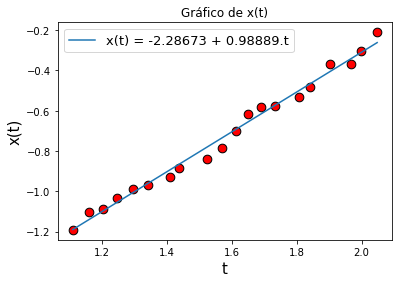

Número de iterações: 26510


In [128]:
plotLinear(ThetaXLinear, x_kick1, y_kick1, ['x(t)','t'])
print('Número de iterações:', iteracoesXLinear)

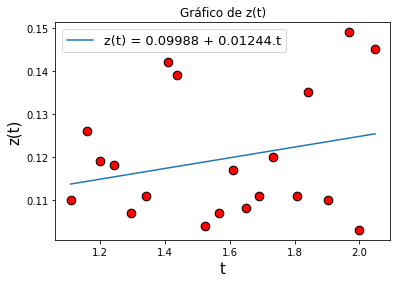

Número de iterações: 12013


In [183]:
plotLinear(ThetaZLinear, z_kick1, y_kick1, ['z(t)','t'])
print('Número de iterações:', iteracoesZLinear)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão linear foi boa, e temos que o número de iterações para x(t) foi de 26510 e para z(t) foi de 12013. Este valor pode ser reduzido aumentando o valor de $\alpha$, se aumentado com destreza pode-se obter um resultado muito semelhante, mais a frente irei demonstrar melhor o impacto de $\alpha$ sobre as regressões.
</p>

<p style="text-align: justify;">
Agora vou plotar a trajetória da bola usando as funções paramétricas, vou plotar em duas perspectivas, de cima e de lado:
</p>

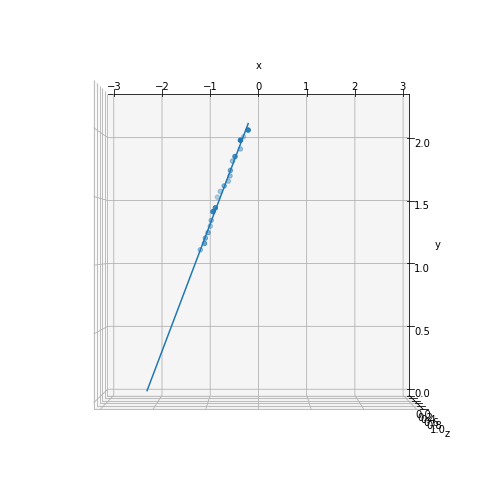

In [204]:
plotTrajetoria3DLinear(ThetaX, ThetaZ, kick1, 'cima')

Agora vou plotar da perspectiva de lado:

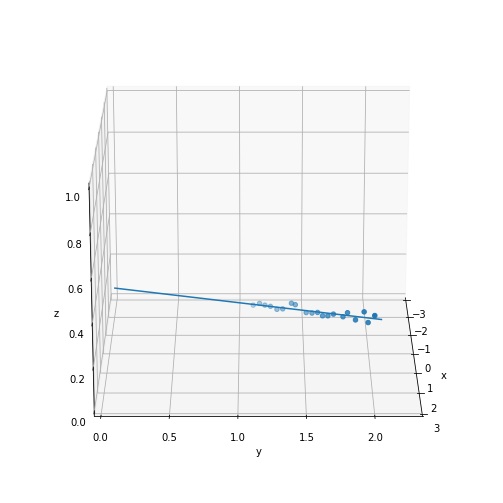

In [215]:
plotTrajetoria3DLinear(ThetaX, ThetaZ, kick1, 'lado')

<p style="text-align: justify;">
&emsp; Note que a trajetória para a regressão linear ficou boa, e se basearmos nessa regressão pode-se dizer que tivemos um chute rasteiro em direção ao canto do gol, partindo aproximadamente de y ~ 2.2 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Agora vou repitir todo esse processo para regressão polinomial de ordem 2. A leitura dos dados já foi feita na etapa anterior e lembre-se utilizarei a prametrização:
                                         $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t&+&c \cdot t^2\\ 
                                        z(t) &= &d &+ &e \cdot t&+&f \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
</p>

<p style="text-align: justify;">
&emsp; Da mesma forma que fiz na regressão linear, vou definir $\theta$ inicial como $\theta_0 = 0$ , $\theta_1  = 0$ e $\theta_2  = 0$ e fazer a regressão polinomial de grau 2 para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [172]:
alfa = 0.01

ThetaInicial = [0,0,0]
ThetaXPoli, iteracoesXPoli = gradienteDescendentePolinomial(ThetaInicial, x_kick1, y_kick1, alfa)

ThetaInicial = [0,0,0]
ThetaZPoli, iteracoesZPoli = gradienteDescendentePolinomial(ThetaInicial, z_kick1, y_kick1, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

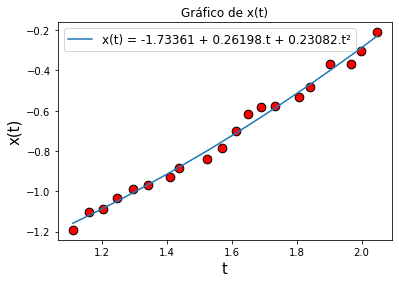

Número de iterações: 299193


In [195]:
plotPolinomial(ThetaXPoli,x_kick1, y_kick1, ['x(t)','t'])
print('Número de iterações:', iteracoesXPoli)

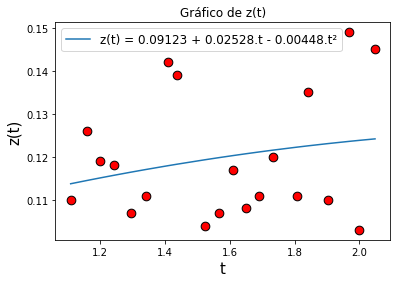

Número de iterações: 23832


In [197]:
plotPolinomial(ThetaZPoli,z_kick1, y_kick1, ['z(t)','t'])
print('Número de iterações:', iteracoesZPoli)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão polinomial de segundo grau foi boa, e temos que o número de iterações para x(t) foi de 299193 e para z(t) foi de 23832. Percebe-se que o número de iterações para x(t) foi grande, e pode ser reduzido aumentando o valor de $\alpha$, isso será analisado mais a frente.
</p>

<p style="text-align: justify;">
&emsp; Agora vou plotar a trajetória da bola usando as funções paramétricas, da mesma forma que fiz na regressão linea, vou plotar em duas perspectivas, de cima e de lado:
</p>

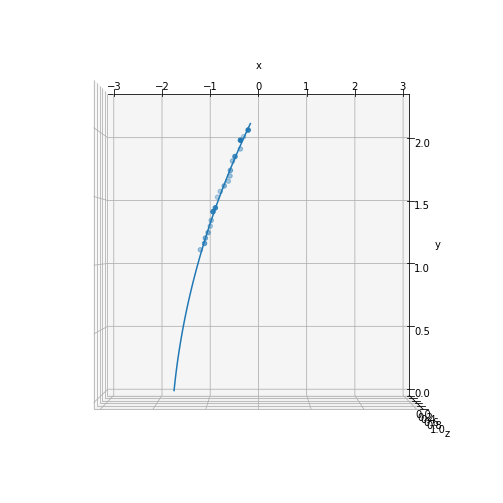

In [213]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'cima')

Agora vou plotar da perspectiva de lado:

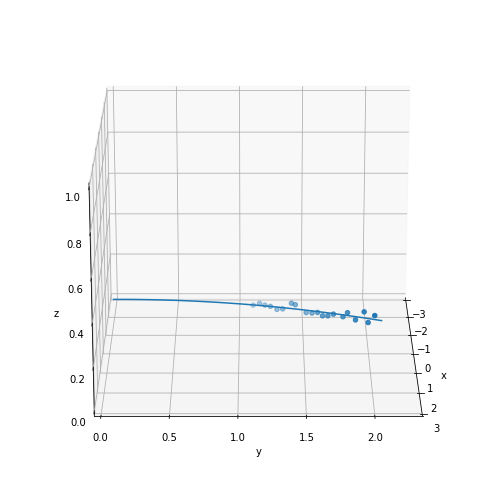

In [214]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'lado')

<p style="text-align: justify;">
&emsp; Note que a trajetória para a regressão polinomial de segundo grau também ficou boa, e se basearmos nessa regressão pode-se dizer que tivemos um chute rasteiro com um leve efeito em direção ao canto do gol, partindo aproximadamente de y ~ 2.1 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Agora vou usar o MSE que implementei pra ver qual dos dois modelos tem menor erro, e verificar qual impacto da regressão linear ou polinomial sobre esse conjunto de dados.<br>
&emsp; Mas note, como fiz regressões para as paramétricas $x(t)$ e $z(t)$ então vou fazer o MSE para cada paramétrica e fazer a média, assim poderei comparar o erro médio entre a regressão linear e polinomial para esse dataset.

In [230]:
xLinear = f(ThetaXLinear, y_kick1, 1)
zLinear = f(ThetaZLinear, y_kick1, 1)

xMSELinear = MSE(xLinear, x_kick1)
zMSELinear = MSE(zLinear, z_kick1)

MSELinearMedio = (xMSELinear+zMSELinear)/2

print('MSE médio para regressão linear:', MSELinearMedio)

MSE médio para regressão linear: 0.0005591848092928865


In [232]:
xPoli = f(ThetaXPoli, y_kick1, 2)
zPoli = f(ThetaZPoli, y_kick1, 2)

xMSEPoli = MSE(xPoli, x_kick1)
zMSEPoli = MSE(zPoli, z_kick1)

MSEPoliMedio = (xMSEPoli+zMSEPoli)/2
print('MSE médio para regressão polinomial de segundo grau:', MSEPoliMedio)

MSE médio para regressão polinomial de segundo grau: 0.00047734819335856776
